In [1]:
#Scraping the data 

In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.safari.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.common.keys import Keys
import pandas as pd
import re
import requests
import pickle

In [ ]:
### Start by setting up the webdriver
driver = webdriver.Edge()
time.sleep(5)
driver.maximize_window()
driver.get("https://www.iwantgreatcare.org/")
time.sleep(5)

In [ ]:
### Find the location bar, type bar, enter values into both of them and hit search

### This little bit of code tells the page to wait until everything is visible.

time.sleep(5)

### get rid of cookies because apparently that is the only way to make this work

WebDriverWait(driver, 30).until(expected_conditions.visibility_of_element_located((By.ID, 'CybotCookiebotDialogBodyLevelButtonLevelOptinAllowAll')))
popup_accept = driver.find_element(By.ID, 'CybotCookiebotDialogBodyButtonDecline')
time.sleep(5)
ActionChains(driver) \
    .click(popup_accept) \
    .perform()
time.sleep(2)

ActionChains(driver)\
    .send_keys(Keys.RETURN)\
    .perform()
time.sleep(5)

### find query bar
WebDriverWait(driver, 50).until(expected_conditions.visibility_of_element_located((By.ID, 'near_text')))

time.sleep(5)
query_elem = driver.find_element(By.ID, 'search')
time.sleep(5)

### click on query bar
ActionChains(driver) \
    .click(query_elem) \
    .perform()
time.sleep(2)

### tell the driver to use the query bar to search for a hospital
ActionChains(driver)\
    .send_keys('hospital')\
    .perform()
time.sleep(2)

### find the search button

WebDriverWait(driver, 50).until(expected_conditions.visibility_of_element_located((By.ID, 'search-button-wrapper')))
search_button = driver.find_element(By.ID, 'search-button-wrapper')
time.sleep(2)
ActionChains(driver) \
    .click(search_button) \
    .perform()
time.sleep(2)

In [ ]:
link = driver.current_url
time.sleep(10)
driver.delete_all_cookies()
time.sleep(1)
driver.quit()
time.sleep(2)

In [ ]:
### now click the part that mentions hospitals
go = True
while go:
    driver = webdriver.Edge()
    time.sleep(2)
    driver.get(link)
    time.sleep(2)
    driver.refresh()
    time.sleep(2)
    a_tags = driver.find_elements(By.TAG_NAME, 'a')
    unique_elements = []
    i = 0
    for item in a_tags:
        unique_elements.append([item,i])
        i+=1
    for element in unique_elements:
        soup = BeautifulSoup(element[0].get_attribute('outerHTML'))
        drilled = soup.html.body
        text = drilled.get_text()
        if text == 'Hospitals':
            index = element[1]
    try:
        if index > 0:
            go = False
    except:
        driver.quit()

In [ ]:
### now use the href to access that page.

### save the href
time.sleep(2)
a = unique_elements[index][0].get_attribute('outerHTML')
soup = BeautifulSoup(a)
search = soup.html.body.find()
atts = search.attrs
href = atts['href']

### refresh this page.
driver.quit()
time.sleep(5)

### reopen it using the href.
driver = webdriver.Edge()
time.sleep(2)
driver.get(('https://www.iwantgreatcare.org' + href))
time.sleep(5)

In [ ]:
run = True
i = 2
hrefs = []
refresher = 0
while run:
    refresher+=1
    ### start the driver
    time.sleep(2)
    driver.refresh
    time.sleep(2)

    ### grab the links to hospital reviews
    coltexts = driver.find_elements(By.TAG_NAME,'h5')
    time.sleep(5)
    for element in coltexts:
        raw_html = element.get_attribute('outerHTML')
        soup = BeautifulSoup(raw_html)
        search = soup.html.body.h5.find()
        atts = search.attrs
        hrefs.append('https://www.iwantgreatcare.org' + atts['href'])

    ### find the next page
    go = False
    next_button = driver.find_elements(By.TAG_NAME, 'span')
    for element in next_button:
        if go == True:
            break
        raw_html = element.get_attribute('outerHTML')
        soup = BeautifulSoup(raw_html)
        try:
            search = soup.body.span.find()
            atts = search.attrs
            a = '/search?search=hospital&page='+str(i)
            search = atts['href'].find(a)
            ### print('----------------')
            ### print(atts['href'])
            if search != -1:
                click_me = 'https://www.iwantgreatcare.org/search?search=hospital&page='+str(i)
                go = True
        except:
            pass
    i+=1
    ### if it can't find the next page, then end the loop.
    right_panel = driver.find_element(By.XPATH, '//*[@id="resultsbox"]/div[1]/div/div[2]')
    time.sleep(1)
    soup_right_panel = BeautifulSoup(right_panel.get_attribute('outerHTML'))
    text = soup_right_panel.body.div.span.text
    split = text.find('of')
    last_no = text[split+3:]
    first_no = text[5:split-1]
    if first_no == last_no:
        run = False
    ### otherwise, click on the next page button
    else:
        driver.refresh()
        time.sleep(2)
        driver.get(click_me)
        response = requests.get(click_me)
        if response.status_code == 403:
            time.sleep(300)
            driver.get(click_me)
        else:
            pass

In [ ]:
### end da driver
driver.quit()

In [ ]:
### set up a nice big list of reviews
reviews = []
titles = []
avg_rating = []
dates = []

In [ ]:
driver = webdriver.Edge()

In [ ]:
### use hrefs list to search
for href in hrefs:
    j = 0
    stop_here = -1
    load_up = True
    try:
        driver = webdriver.Edge()
    except:
        driver.quit()
        time.sleep(1)
        driver = webdriver.Edge()
    time.sleep(1)
    while load_up:
        try:
            driver.get(href)
            load_up = False
        except:
            try:
                driver.quit()
            except:
                pass
    time.sleep(1)

    ### check if there are actually any reviews
    no_of_reviews = driver.find_element(By.CLASS_NAME, 'entity-reviews-count')
    soup = BeautifulSoup(no_of_reviews.get_attribute('outerHTML'))
    number = soup.a.span.text.strip()
    number_list = number.split(',')
    number = ''
    for item in number_list:
        number = number+item
    if number == '0':
        loop = False
        driver.quit()
    elif int(number) <= 10:
        stop_here = -1
        boxes = driver.find_elements(By.CLASS_NAME, "review-text-container")
        time.sleep(2)
        for box in boxes:
            cont_rest = True
            soup = BeautifulSoup(box.get_attribute('outerHTML'))
            # dates
            child = soup.div.div.div
            siblings = child.next_siblings
            for child in child.next_siblings:
                try:
                    atts = child.attrs
                    if atts['class'] == ['review-date']:
                        last_two = child.text[-2:]
                        if int(last_two) < 20:
                            cont_rest = False
                        else:
                            dates.append(child.text)
                        except:
                    pass
            if cont_rest:
                # review
                P = soup.div.p.text
                reviews.append(P)
                # names
                span_1 = soup.div.span.text
                titles.append(span_1)
                # avg rating
                try:
                    img = soup.img
                    img_atts = img.attrs
                    rating_string = img_atts['title']
                    rating = rating_string.strip(' Stars')
                    avg_rating.append(rating)
                except:
                    avg_rating.append(5.0)
        driver.quit()
        loop = False
    else:
        loop = True
    ### look through each hospital
    while loop:
        # this is to cache it in case it breaks part-way
        with open('reviews_pickle','wb') as f:
            pickle.dump(reviews,f)
        with open('titles_pickle','wb') as f:
            pickle.dump(titles,f)
        with open('avg_rating_pickle','wb') as f:
            pickle.dump(avg_rating,f)
        with open('dates_pickle','wb') as f:
            pickle.dump(dates,f)
        j+=1
        boxes = driver.find_elements(By.CLASS_NAME, "review-text-container")
        time.sleep(2)
        for box in boxes:
            cont_rest = True
            soup = BeautifulSoup(box.get_attribute('outerHTML'))
            # dates
            child = soup.div.div.div
            siblings = child.next_siblings
            for child in child.next_siblings:
                try:
                    atts = child.attrs
                    if atts['class'] == ['review-date']:
                        last_two = child.text[-2:]
                        if int(last_two) < 20:
                            ##### loop fails to move from one hospital to the next.
                            cont_rest = False
                        else:
                            dates.append(child.text)
                except:
                    pass
            if cont_rest:
                # review
                P = soup.div.p.text
                reviews.append(P)
                # names
                span_1 = soup.div.span.text
                titles.append(span_1)
                # avg rating
                # some of these boxes are 'say thank you' boxes. If the soup has no img, then assume 5 stars, as this is a special thanks from the
                # patient.
                try:
                    img = soup.img
                    img_atts = img.attrs
                    rating_string = img_atts['title']
                    rating = rating_string.strip(' Stars')
                    avg_rating.append(rating)
                except:
                    avg_rating.append(5.0)
            if cont_rest:
            pass
        else:
            driver.quit()
            loop = False
        
        ### go to the next page
        if j == 1:
            pass
        else:
            driver.quit()
            time.sleep(1)
            driver = webdriver.Edge()
            time.sleep(1)
            ### change this part when sending, only did this because the conda broke partway through
            a = (href+'?page='+str(j))
            driver.get(a)
            time.sleep(1)
        try:
            WebDriverWait(driver, 50).until(expected_conditions.visibility_of_element_located((By.CLASS_NAME, 'right')))
            div_right = driver.find_element(By.CLASS_NAME, 'right')

            raw_html = div_right.get_attribute('outerHTML')
            soup = BeautifulSoup(raw_html)
            text = soup.text
            of_index = text.find('of ')
            last_number = text[of_index+3:].strip('\n')
            spans = driver.find_elements(By.TAG_NAME, 'span')
            for item in spans:
                soup = BeautifulSoup(item.get_attribute('outerHTML'))
                try:
                    text = soup.a.text
                    if text == '›':
                        atts = soup.body.span.a.attrs
                        ### also change this part
                        link = str(href) + atts['href']
                        number = atts['href'][6:]
                except:
                    pass
            if number != last_number:
                load_up = True
                driver.refresh()
                time.sleep(1)
                while load_up:
                    try:
                        driver.get(link)
                        time.sleep(1)
                        load_up = False
                    except:
                        try:
                            driver.quit()
                            load_up = False
                        except:
                            pass
                driver.refresh()
                time.sleep(1)
            else:
                driver.quit()
                loop = False
        except:
            driver.quit()
            loop = False

In [ ]:
dataframe = pd.DataFrame()
dataframe['titles'] = titles
dataframe['reviews'] = reviews
dataframe['avg_ratings'] = avg_rating
dataframe['dates'] = dates

dataframe.to_csv('national_results_total')

In [3]:
#Cleaning the data

In [3]:
import pandas as pd

In [17]:
df = pd.read_csv("london_reviews", index_col=0)
df

,titles,reviews,avg_ratings,dates
Unnamed: 0,,,,
0,Queen's Hospital,Dr Saris was very informative of the care that...,4.5,12th February 2025
1,Queen's Hospital,From first contacting 111 to discharge the tre...,5.0,12th February 2025
2,Queen's Hospital,Everyone was extremely kind and supportive to ...,5.0,12th February 2025
3,Queen's Hospital,The communication between the different depart...,4.0,12th February 2025
4,Queen's Hospital,I am still waiting for the outcome of the mri ...,3.0,12th February 2025
...,...,...,...,...
207114,St George's Hospital,I am a 78 years old man & I suffered with seve...,5.0,8th May 2025
207115,St George's Hospital,I stayed for 10 days in the neurosurgery wards...,5.0,22nd March 2025
207116,St Mark's Hospital,the IBD team at St Marks always provide excell...,5.0,11th May 2025


In [19]:
# feature engineering

# remove \n from titles - same title as one hospital.

remove_n = lambda title: title.strip('                \n')
df.titles = df.titles.apply(remove_n)

df

,titles,reviews,avg_ratings,dates
Unnamed: 0,,,,
0,Queen's Hospital,Dr Saris was very informative of the care that...,4.5,12th February 2025
1,Queen's Hospital,From first contacting 111 to discharge the tre...,5.0,12th February 2025
2,Queen's Hospital,Everyone was extremely kind and supportive to ...,5.0,12th February 2025
3,Queen's Hospital,The communication between the different depart...,4.0,12th February 2025
4,Queen's Hospital,I am still waiting for the outcome of the mri ...,3.0,12th February 2025
...,...,...,...,...
207114,St George's Hospital,I am a 78 years old man & I suffered with seve...,5.0,8th May 2025
207115,St George's Hospital,I stayed for 10 days in the neurosurgery wards...,5.0,22nd March 2025
207116,St Mark's Hospital,the IBD team at St Marks always provide excell...,5.0,11th May 2025


In [21]:
# remove NaNs from df

index_list = []
index = []

def nan_index(review):
    if type(review) != str:
        index_list.append(len(index))
    index.append(0)

df.reviews.apply(nan_index)

for index_iterator in index_list:
    df.drop([index_iterator], inplace=True)

df

,titles,reviews,avg_ratings,dates
Unnamed: 0,,,,
0,Queen's Hospital,Dr Saris was very informative of the care that...,4.5,12th February 2025
1,Queen's Hospital,From first contacting 111 to discharge the tre...,5.0,12th February 2025
2,Queen's Hospital,Everyone was extremely kind and supportive to ...,5.0,12th February 2025
3,Queen's Hospital,The communication between the different depart...,4.0,12th February 2025
4,Queen's Hospital,I am still waiting for the outcome of the mri ...,3.0,12th February 2025
...,...,...,...,...
207114,St George's Hospital,I am a 78 years old man & I suffered with seve...,5.0,8th May 2025
207115,St George's Hospital,I stayed for 10 days in the neurosurgery wards...,5.0,22nd March 2025
207116,St Mark's Hospital,the IBD team at St Marks always provide excell...,5.0,11th May 2025


In [22]:
import contractions

# Function to expand contractions using the 'contractions' library
def expand_contractions(text):
    return contractions.fix(text)



df["cleaned"] = df["reviews"].apply(expand_contractions)
print("\nCleaned Text:")
print(df["cleaned"])


Cleaned Text:
  Unnamed: 0
0         Dr Saris was very informative of the care that...
1         From first contacting 111 to discharge the tre...
2         Everyone was extremely kind and supportive to ...
3         The communication between the different depart...
4         I am still waiting for the outcome of the mri ...
                                ...                        
207114    I am a 78 years old man & I suffered with seve...
207115    I stayed for 10 days in the neurosurgery wards...
207116    the IBD team at St Marks always provide excell...
207117                          Very good and caring staff.
207118    my medical treatment and care by doctors and n...
Name: cleaned, Length: 154586, dtype: object


In [25]:
#Lowercasing and lemmatisation using SpaCy + Tokenization

import spacy
import pandas as pd
from spacy.lang.en.stop_words import STOP_WORDS

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Define important intensifiers you want to keep
important_modifiers = {
    "very", "really", "quite", "so", "too", "extremely", "incredibly", "absolutely",
    "totally", "highly", "deeply", "slightly", "a bit", "somewhat", "fairly",
    "mildly", "kind of", "barely", "hardly"
}

# Create custom stopwords (remove intensifiers from default stopwords)
custom_stopwords = STOP_WORDS - important_modifiers

# Define text cleaning function
def clean_text(text):
    doc = nlp(text)
    cleaned_tokens = []

    for token in doc:
        if token.is_punct and token.text != '.':
            continue  # Remove punctuation except full stop
        if token.is_space:
            continue
        
        lemma = token.lemma_.lower().strip()
        
        # Keep tokens that are not in stopwords
        if lemma and lemma not in custom_stopwords:
            cleaned_tokens.append(lemma)
        
        # Also keep raw form of known intensifiers like "a bit" if missed by lemmatizer
        elif token.text.lower() in important_modifiers:
            cleaned_tokens.append(token.text.lower())

    return ' '.join(cleaned_tokens)

# Apply to your DataFrame
# Make sure your DataFrame has a column called 'cleaned'
df['cleaned_reviews'] = df['cleaned'].apply(clean_text)

# View result
df[['cleaned', 'cleaned_reviews']].head()


,cleaned,cleaned_reviews
Unnamed: 0,,
0,Dr Saris was very informative of the care that...,dr saris very informative care require vacilla...
1,From first contacting 111 to discharge the tre...,contact 111 discharge treatment receive queens...
2,Everyone was extremely kind and supportive to ...,extremely kind supportive ward very busy . sta...
3,The communication between the different depart...,communication different department poor lead c...
4,I am still waiting for the outcome of the mri ...,wait outcome mri tuesday 4th february . gp una...


In [26]:
#Cleaning the space before the full stop
import re

df['cleaned_reviews'] = df['cleaned_reviews'].str.replace(r'\s+\.', '.', regex=True)


In [27]:
#Cleaning reviews that are only full stops

df = df[~df['cleaned_reviews'].str.strip().eq('.')]

df['cleaned_reviews'].to_csv("Check.csv", index=False)


In [28]:
#Cleaning from empty spaces and n, na

df['cleaned_reviews'] = df['cleaned_reviews'].astype(str)  # Ensure it's all strings

df = df[~df['cleaned_reviews'].str.strip().str.lower().isin(['', '.', 'n', 'na', 'na.','n a.'])]

/var/folders/mb/c36w735d3y15n1095v443mq00000gn/T/ipykernel_1153/2900290288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_reviews'] = df['cleaned_reviews'].astype(str)  # Ensure it's all strings


In [29]:
# Adding a full stop at the end if it's missing (ignores whitespace at the end)

df['cleaned_reviews'] = df['cleaned_reviews'].str.strip()  # Remove leading/trailing spaces
df['cleaned_reviews'] = df['cleaned_reviews'].apply(lambda x: x + '.' if not x.endswith('.') else x)

In [35]:
#ASPECT EXTRACTION

aspect_dict = {
    "doctor": ["doctor", "consultant", "physician", "gp", "dr", "specialist", "clinician"],
    "staff": ["nurse", "receptionist", "personnel", "team", "staff", "assistant", "front desk", "admin staff", "support staff", "medical team", "ward staff", "ward staff", "service", "midwife", "pharmacist"],
    "waiting_time": ["waiting", "hour", "delay", "appointment", "queue", "wait", "time slot", "schedule", "walk in", "line", "slot", "backlog", "overrun"],
    "treatment": ["treatment", "procedure", "care", "surgery", "therapy", "medication", "diagnosis", "prescription", "operation", "recovery", "plan", "course of treatment", "outcome", "result", "intervention", "pain relief", "med", "dosage"],
    "facilities": ["parking", "building", "clinic", "equipment", "environment", "hospital", "room", "ward", "area", "toilets", "reception", "lift", "entrance", "waiting room", "seating", "signage", "canteen", "bed", "corridor", "lighting", "mru"],
    "communication": ["communication", "information", "explanation", "advice", "instruction", "conversation", "discussion", "feedback", "update", "question", "answer", "interaction", "response", "clarity"],
    "accessibility": ["access", "transport", "directions", "find", "bus", "train", "car", "bicycle"],
    "cleanliness": ["clean", "dirty", "hygiene", "safety", "infection", "sanitiser"]
    
}

In [37]:
import spacy.cli
spacy.cli.download("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 1.0 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [38]:
#Splitting reviews into sentences
nlp = spacy.load("en_core_web_sm")

sentences = []

for idx, row in df.iterrows():
    review_id = idx
    cleaned_reviews = row['cleaned_reviews']
    doc = nlp(cleaned_reviews)
    for sent in doc.sents:
        sentences.append({
            "review_id": review_id,
            "sentence": sent.text.strip()
        })
#Convert to DataFrame 
sent_df = pd.DataFrame(sentences)
sent_df.to_csv("split_sentences.csv", index=False)

In [39]:
#Defining a function to match aspects in a Sentence

def match_aspects(sentence, aspect_dic):
    sentence_lower = sentence.lower()
    matched_aspects = []

    for aspect, keywords in aspect_dict.items():
        for keyword in keywords:
            if keyword in sentence_lower:
                matched_aspects.append(aspect)
                break
                
    return matched_aspects

In [40]:
#Applying it to our data
sent_df["aspects"] = sent_df["sentence"].apply(lambda x: match_aspects(x, aspect_dict))

In [42]:
counter = []
def count_me(x):
    if len(x) > 0:
        counter.append(0)
    else:
        pass
sent_df.aspects.apply(count_me)
len(counter)

175760

In [43]:
empty_aspects_funct = lambda x: 1 if len(x) == 0 else 0

sent_df.empties = sent_df.aspects.apply(empty_aspects_funct)
empty_row = sent_df.loc[(sent_df.empties == 1)]
empty_row

/var/folders/mb/c36w735d3y15n1095v443mq00000gn/T/ipykernel_1153/796708423.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  sent_df.empties = sent_df.aspects.apply(empty_aspects_funct)


,review_id,sentence,aspects
4,1,need nhs.,[]
8,2,very grateful support receive.,[]
14,5,concerned friendly efficient quickly deal.,[]
16,6,extremely nauseas actively vomit toilet.,[]
18,6,instead come check beg help.,[]
...,...,...,...
265543,207114,hfs.,[]
265546,207114,wise sound decision.,[]
265547,207114,day start improve improve month later.,[]
265549,207114,mr. timothy jones praise skys wish brother fre...,[]


In [44]:
#Removing sentences without aspects

sent_df = sent_df[sent_df["aspects"].apply(lambda x: len(x) > 0)]
sent_df.reset_index(drop=True, inplace=True)

In [45]:
sent_df

,review_id,sentence,aspects
0,0,dr saris very informative care require vacilla...,"[doctor, treatment, accessibility]"
1,0,waiting time totally unacceptable time waste p...,"[waiting_time, facilities]"
2,1,contact 111 discharge treatment receive queens...,[treatment]
3,1,staff ocean b brilliant.,[staff]
4,2,extremely kind supportive ward very busy.,"[facilities, accessibility]"
...,...,...,...
175755,207115,outpatient neurology team notch.,[staff]
175756,207116,ibd team st marks provide excellent care support.,"[staff, treatment, accessibility]"
175757,207116,receive great care nurse gladstone 2 ward cent...,"[staff, treatment, facilities, accessibility]"
175758,207117,very good caring staff.,"[staff, accessibility]"


In [46]:
sent_df.to_csv("polarity_data.csv", index=False)

In [61]:
#LABELING THE DATA BY POLARITY 

!pip install nltk

import nltk 
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/agunikkirakosian/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [62]:
#Defying a function to get polarity labels

def get_sentiment_label(sentence):
    score = vader.polarity_scores(sentence)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [65]:
#Applying the function to the dataframe
sent_df['sentiment'] = sent_df['sentence'].apply(get_sentiment_label)

In [66]:
# The raw sentiment score

def get_sentiment_info(sentence):
    scores = vader.polarity_scores(sentence)
    return pd.Series({
        'sentiment': (
            'positive' if scores['compound'] >= 0.05
            else 'negative' if scores['compound'] <= -0.05
            else 'neutral'
        ),
        'compound': scores['compound'],
        'neg': scores['neg'],
        'neu': scores['neu'],
        'pos': scores['pos']
    })

sent_df[['sentiment', 'compound', 'neg', 'neu', 'pos']] = sent_df['sentence'].apply(get_sentiment_info)

In [67]:
sent_df

,review_id,sentence,aspects,sentiment,compound,neg,neu,pos
0,0,dr saris very informative care require vacilla...,"[doctor, treatment, accessibility]",positive,0.5390,0.000,0.721,0.279
1,0,waiting time totally unacceptable time waste p...,"[waiting_time, facilities]",negative,-0.7474,0.414,0.586,0.000
2,1,contact 111 discharge treatment receive queens...,[treatment],positive,0.5719,0.000,0.654,0.346
3,1,staff ocean b brilliant.,[staff],positive,0.5859,0.000,0.345,0.655
4,2,extremely kind supportive ward very busy.,"[facilities, accessibility]",positive,0.7328,0.000,0.393,0.607
...,...,...,...,...,...,...,...,...
175755,207115,outpatient neurology team notch.,[staff],neutral,0.0000,0.000,1.000,0.000
175756,207116,ibd team st marks provide excellent care support.,"[staff, treatment, accessibility]",positive,0.8625,0.000,0.342,0.658
175757,207116,receive great care nurse gladstone 2 ward cent...,"[staff, treatment, facilities, accessibility]",positive,0.8074,0.000,0.451,0.549
175758,207117,very good caring staff.,"[staff, accessibility]",positive,0.7698,0.000,0.231,0.769


In [68]:
sent_df["sentiment"].value_counts()

sentiment
positive    129743
neutral      30091
negative     15926
Name: count, dtype: int64

In [ ]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!! Sample for Manual Labeling 

Sample = pd.read_csv('copy_labeled_sentiment_and_aspect.txt')

Sample.drop(['compound', 'neg', 'neu', 'pos', 'manual_sentiment'],axis="columns", inplace=True)

Sample["review_id"] = range(len(Sample))
Sample


In [73]:
Sample = pd.read_csv('copy_labeled_sentiment_and_aspect.txt', sep=',')

Sample.drop(['numbers', 'review_id'], axis = 'columns', inplace=True)

Sample

,sentence,aspects,sentiment
0,terrible treatment leave physically mentally t...,['treatment'],negative
1,long wait time ed. information.,['waiting_time'],negative
2,7 hour e offer thing eat drink.,['waiting_time'],negative
3,paramedic great too ease aspire paramedic grea...,['staff'],positive
4,paramedic great advice.,['communication'],positive
...,...,...,...
542,excellent treatment room.,['facilities'],positive
543,carering staff deserve mention very caring cle...,['staff'],positive
544,admitting nurse numia very thorough.,['staff'],positive
545,very caring.,['staff'],positive


In [75]:
Sample['aspects'] = Sample['aspects'].str.replace(r"[\[\]']", '', regex=True)

Sample

,sentence,aspects,sentiment
0,terrible treatment leave physically mentally t...,treatment,negative
1,long wait time ed. information.,waiting_time,negative
2,7 hour e offer thing eat drink.,waiting_time,negative
3,paramedic great too ease aspire paramedic grea...,staff,positive
4,paramedic great advice.,communication,positive
...,...,...,...
542,excellent treatment room.,facilities,positive
543,carering staff deserve mention very caring cle...,staff,positive
544,admitting nurse numia very thorough.,staff,positive
545,very caring.,staff,positive


In [77]:
############ SENTIMENT MODEL#################

# Combining reviw text and aspects

Sample['input_text'] = Sample['sentence'] + ' [ASPECT] ' + Sample['aspects']

Sample

,sentence,aspects,sentiment,input_text
0,terrible treatment leave physically mentally t...,treatment,negative,terrible treatment leave physically mentally t...
1,long wait time ed. information.,waiting_time,negative,long wait time ed. information. [ASPECT] waiti...
2,7 hour e offer thing eat drink.,waiting_time,negative,7 hour e offer thing eat drink. [ASPECT] waiti...
3,paramedic great too ease aspire paramedic grea...,staff,positive,paramedic great too ease aspire paramedic grea...
4,paramedic great advice.,communication,positive,paramedic great advice. [ASPECT] communication
...,...,...,...,...
542,excellent treatment room.,facilities,positive,excellent treatment room. [ASPECT] facilities
543,carering staff deserve mention very caring cle...,staff,positive,carering staff deserve mention very caring cle...
544,admitting nurse numia very thorough.,staff,positive,admitting nurse numia very thorough. [ASPECT] ...
545,very caring.,staff,positive,very caring. [ASPECT] staff


In [79]:
#Encoding sentiment labels
# 0 -negative, 1 - neutral, 2-positive
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

Sample['label'] = le.fit_transform(Sample['sentiment'])
Sample

,sentence,aspects,sentiment,input_text,label
0,terrible treatment leave physically mentally t...,treatment,negative,terrible treatment leave physically mentally t...,0
1,long wait time ed. information.,waiting_time,negative,long wait time ed. information. [ASPECT] waiti...,0
2,7 hour e offer thing eat drink.,waiting_time,negative,7 hour e offer thing eat drink. [ASPECT] waiti...,0
3,paramedic great too ease aspire paramedic grea...,staff,positive,paramedic great too ease aspire paramedic grea...,2
4,paramedic great advice.,communication,positive,paramedic great advice. [ASPECT] communication,2
...,...,...,...,...,...
542,excellent treatment room.,facilities,positive,excellent treatment room. [ASPECT] facilities,2
543,carering staff deserve mention very caring cle...,staff,positive,carering staff deserve mention very caring cle...,2
544,admitting nurse numia very thorough.,staff,positive,admitting nurse numia very thorough. [ASPECT] ...,2
545,very caring.,staff,positive,very caring. [ASPECT] staff,2


In [81]:
#Balancing classes

from sklearn.utils import resample

Sample_majority = Sample[Sample.sentiment == 'positive']
Sample_minority_neutral = Sample[Sample.sentiment == 'neutral']
Sample_minority_negative = Sample[Sample.sentiment == 'negative']

Sample_neutral_upsampled = resample(Sample_minority_neutral,
                                     replace=True,
                                     n_samples=len(Sample_majority),
                                     random_state=42)

Sample_negative_upsampled = resample(Sample_minority_negative,
                                     replace=True,
                                     n_samples=len(Sample_majority),
                                     random_state=42)

Sample_balanced = pd.concat([Sample_majority, Sample_neutral_upsampled, Sample_negative_upsampled])

In [83]:
#Vectorizing the text using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X=vectorizer.fit_transform(Sample_balanced['input_text'])
y=Sample_balanced['label']

In [85]:
#Training a Classifier 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

    negative       0.97      0.94      0.95       154
     neutral       0.99      1.00      0.99       156
    positive       0.94      0.96      0.95       162

    accuracy                           0.96       472
   macro avg       0.96      0.96      0.96       472
weighted avg       0.96      0.96      0.96       472



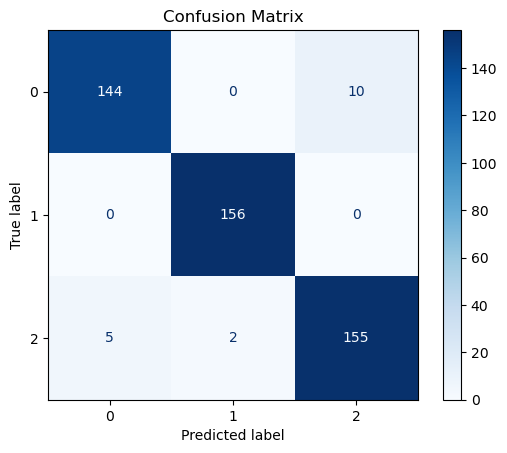

In [87]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [89]:
# Cross-validation and best parametres 

from sklearn.model_selection import GridSearchCV


#gridsearch l1l2 logreg
param_grid = {
    'C':[0.01, 0.1, 1, 10, 100],
    'penalty':['l1','l2'],
    'solver':['liblinear','saga'],
    'class_weight':['balanced']
}

model = LogisticRegression()
gridsearch = GridSearchCV(
    model,
    param_grid,
    scoring='accuracy',
    n_jobs=-1,
)

gridsearch.fit(X_train, y_train)

l1_l2_saga_liblinear = gridsearch.best_estimator_
test_score = l1_l2_saga_liblinear.score(X_test, y_test)
l1_l2_saga_liblinear_best_params = gridsearch.best_params_
l1_l2_saga_liblinear_best_score = test_score

#gridsearch lbfgs

param_grid = {
    'C':[0.01, 0.1, 1, 10, 100],
    'penalty':['l2'],
    'solver':['lbfgs'],
    'max_iter':[1000],
    'class_weight':['balanced']
}

model = LogisticRegression()
gridsearch = GridSearchCV(
    model,
    param_grid,
    scoring='accuracy',
    n_jobs=-1,
)

gridsearch.fit(X_train, y_train)

lbfgs = gridsearch.best_estimator_
test_score = lbfgs.score(X_test, y_test)
lbfgs_best_params = gridsearch.best_params_
lbfgs = test_score

#gridsearch XGBoost

from scipy.stats import uniform, randint
from xgboost import XGBClassifier

param_dist = {
    'n_estimators': [randint.rvs(100, 1000)],           # number of boosting rounds
    'learning_rate': [uniform.rvs(0.01, 0.3)],          # step size shrinkage
    'max_depth': [randint.rvs(3, 10)],                  # max depth of trees
    'min_child_weight': [randint.rvs(1, 10)],           # min sum of instance weight in a child
    'gamma': [uniform.rvs(0, 0.5)],                     # minimum loss reduction
    'subsample': [uniform.rvs(0.5, 0.5)],               # fraction of training data used
    'colsample_bytree': [uniform.rvs(0.5, 0.5)],        # fraction of features used per tree
    'reg_alpha': [uniform.rvs(0, 1)],                   # L1 regularization
    'reg_lambda': [uniform.rvs(0, 1)]                   # L2 regularization
}

model = XGBClassifier()
gridsearch = GridSearchCV(
    model,
    param_grid,
    scoring='accuracy',
    n_jobs=-1,
)

gridsearch.fit(X_train, y_train)

xgboost = gridsearch.best_estimator_
test_score = xgboost.score(X_test, y_test)
XGB_best_params = gridsearch.best_params_
xgboost = test_score

#gridsearch randomforest

from sklearn.ensemble import RandomForestClassifier
param_dist = {
    'n_estimators': [randint.rvs(100, 500)],             # Number of trees
    'max_depth': [randint.rvs(10, 20)],                    # Max tree depth
    'min_samples_split': [randint.rvs(2, 30)],            # Min samples to split a node
    'min_samples_leaf': [randint.rvs(10, 50)],             # Min samples per leaf
    'max_features': ['sqrt', 'log2', None],         # Features per split
    'bootstrap': [True, False],                     # Whether to use bootstrapping
    'criterion': ['gini', 'entropy', 'log_loss']    # Splitting criterion
}

gridsearch.fit(X_train, y_train)

randomforest = gridsearch.best_estimator_
test_score = randomforest.score(X_test, y_test)
RF_best_params = gridsearch.best_params_
randomforest = test_score

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter 

L1, L2, logistic_regression score = 0.9682203389830508
LBFGS logistic_regression score = 0.9682203389830508
XGboost score = 0.940677966101695
RandomForest score = 0.940677966101695


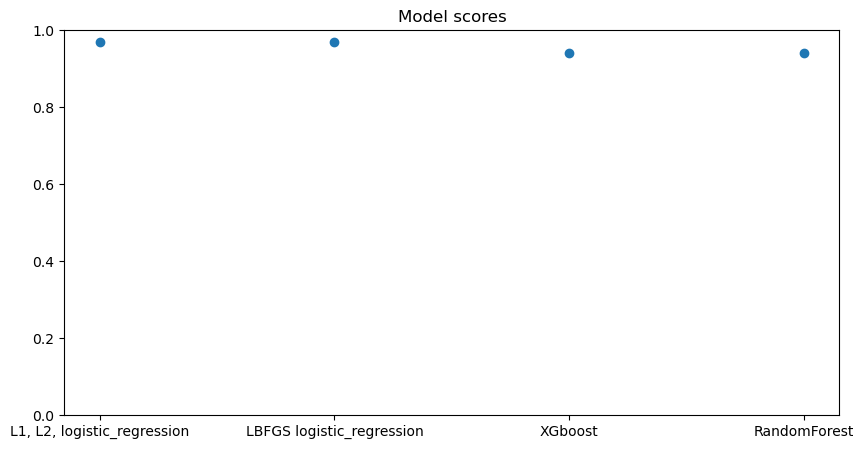

In [91]:
scores = [l1_l2_saga_liblinear_best_score,lbfgs,xgboost,randomforest]
fig, ax = plt.subplots(figsize = (10,5))
models = ['L1, L2, logistic_regression', 'LBFGS logistic_regression', 'XGboost', 'RandomForest']
ax.set_ylim(0,1)
ax.scatter(models, scores)
ax.set_title('Model scores')

i=0
for score in scores:
    print(f"{models[i]} score = {score}")
    i+=1

In [ ]:
##### Getting the aspects for the whole data using the Hugging Face transformer (trying to use a different model to improve aspects extraction

In [77]:
#Hugging Face

# !pip install transformers
sent_df.to_csv('sent_df')

slice_1 = sent_df.iloc[:len(sent_df)//2]
slice_2 = sent_df.iloc[len(sent_df)//2:]

slice_2.to_csv('slice_2')

In [79]:
from transformers import pipeline
import pandas as pd
from tqdm import tqdm

# Your aspect labels
candidate_labels = [
    "staff", "treatment", "communication", "facilities", "waiting_time",
    "doctor", "appointment", "administration", "accessibility", "cleanliness", "other"
]

# Load zero-shot classifier
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# If your DataFrame is called df and has a 'sentence' column:
def classify_aspect(text):
    result = classifier(text, candidate_labels)
    return result['labels'][0]  # top prediction

# Apply to your dataset
tqdm.pandas()  # progress bar
slice_1['predicted_aspect'] = slice_1['sentence'].progress_apply(classify_aspect)


Device set to use mps:0
100%|██████████████████████████████████| 87880/87880 [23:23:37<00:00,  1.04it/s]
/var/folders/mb/c36w735d3y15n1095v443mq00000gn/T/ipykernel_95295/3624776440.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slice_1['predicted_aspect'] = slice_1['sentence'].progress_apply(classify_aspect)


In [95]:
sent_df

,review_id,sentence,aspects,sentiment,compound,neg,neu,pos
0,0,dr saris very informative care require vacilla...,"[doctor, treatment, accessibility]",positive,0.5390,0.000,0.721,0.279
1,0,waiting time totally unacceptable time waste p...,"[waiting_time, facilities]",negative,-0.7474,0.414,0.586,0.000
2,1,contact 111 discharge treatment receive queens...,[treatment],positive,0.5719,0.000,0.654,0.346
3,1,staff ocean b brilliant.,[staff],positive,0.5859,0.000,0.345,0.655
4,2,extremely kind supportive ward very busy.,"[facilities, accessibility]",positive,0.7328,0.000,0.393,0.607
...,...,...,...,...,...,...,...,...
175755,207115,outpatient neurology team notch.,[staff],neutral,0.0000,0.000,1.000,0.000
175756,207116,ibd team st marks provide excellent care support.,"[staff, treatment, accessibility]",positive,0.8625,0.000,0.342,0.658
175757,207116,receive great care nurse gladstone 2 ward cent...,"[staff, treatment, facilities, accessibility]",positive,0.8074,0.000,0.451,0.549
175758,207117,very good caring staff.,"[staff, accessibility]",positive,0.7698,0.000,0.231,0.769


In [101]:
# sent_df

first_half = pd.read_csv('first_half_of_sent_df.csv')
second_half = pd.read_csv('second_half_of_sent_df')
sent_df = pd.concat([first_half, second_half])
sent_df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'aspects'], axis='columns', inplace=True)

# Getting the polarity using our trained L1L2 model

# Combining reviw text and aspects

sent_df['input_text'] = sent_df['sentence'] + ' [ASPECT] ' + sent_df['predicted_aspect']

sent_df

,review_id,sentence,predicted_aspect,input_text
0,0,dr saris very informative care require vacilla...,doctor,dr saris very informative care require vacilla...
1,0,waiting time totally unacceptable time waste p...,waiting_time,waiting time totally unacceptable time waste p...
2,1,contact 111 discharge treatment receive queens...,treatment,contact 111 discharge treatment receive queens...
3,1,staff ocean b brilliant.,staff,staff ocean b brilliant. [ASPECT] staff
4,2,extremely kind supportive ward very busy.,staff,extremely kind supportive ward very busy. [ASP...
...,...,...,...,...
87875,207115,outpatient neurology team notch.,staff,outpatient neurology team notch. [ASPECT] staff
87876,207116,ibd team st marks provide excellent care support.,staff,ibd team st marks provide excellent care suppo...
87877,207116,receive great care nurse gladstone 2 ward cent...,facilities,receive great care nurse gladstone 2 ward cent...
87878,207117,very good caring staff.,staff,very good caring staff. [ASPECT] staff


In [103]:
# checking best hyperparameters
print(l1_l2_saga_liblinear_best_params)

{'C': 100, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


In [105]:
# model intialisation with optimal hyperparameters
clf_optimal = LogisticRegression(C=100, class_weight='balanced', penalty='l2', solver='saga')

# encoding training data
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X=vectorizer.fit_transform(Sample_balanced['input_text'])
y=Sample_balanced['label']

# fitting model
clf_optimal.fit(X,y)

# vectorizing all text
X_full = vectorizer.transform(sent_df['input_text'])

# model predictions
y_pred = clf_optimal.predict(X_full)
sent_df['predicted_sentiment'] = y_pred
sent_df

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,review_id,sentence,predicted_aspect,input_text,predicted_sentiment
0,0,dr saris very informative care require vacilla...,doctor,dr saris very informative care require vacilla...,2
1,0,waiting time totally unacceptable time waste p...,waiting_time,waiting time totally unacceptable time waste p...,0
2,1,contact 111 discharge treatment receive queens...,treatment,contact 111 discharge treatment receive queens...,2
3,1,staff ocean b brilliant.,staff,staff ocean b brilliant. [ASPECT] staff,2
4,2,extremely kind supportive ward very busy.,staff,extremely kind supportive ward very busy. [ASP...,2
...,...,...,...,...,...
87875,207115,outpatient neurology team notch.,staff,outpatient neurology team notch. [ASPECT] staff,2
87876,207116,ibd team st marks provide excellent care support.,staff,ibd team st marks provide excellent care suppo...,2
87877,207116,receive great care nurse gladstone 2 ward cent...,facilities,receive great care nurse gladstone 2 ward cent...,2
87878,207117,very good caring staff.,staff,very good caring staff. [ASPECT] staff,2


Total no. of positive reviews was 137523.
Total no. of neutral reviews was 7321.
Total no. of negative reviews was 30912.


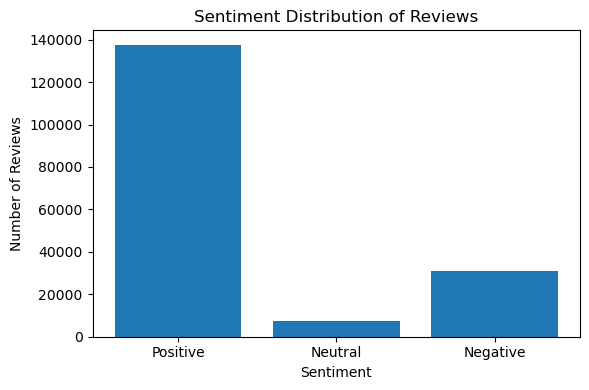

In [268]:
# initial EDA on sentiment data

total_positive_reviews = len(sent_df.predicted_sentiment.loc[(sent_df.predicted_sentiment == 2)])
total_negative_reviews = len(sent_df.predicted_sentiment.loc[(sent_df.predicted_sentiment == 0)])
total_neutral_reviews = len(sent_df.predicted_sentiment.loc[(sent_df.predicted_sentiment == 1)])

print(f"Total no. of positive reviews was {total_positive_reviews}.")
print(f"Total no. of neutral reviews was {total_neutral_reviews}.")
print(f"Total no. of negative reviews was {total_negative_reviews}.")


# Counts
sentiment_counts = [total_positive_reviews, total_neutral_reviews, total_negative_reviews]
labels = ['Positive', 'Neutral', 'Negative']

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(labels, sentiment_counts)
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()


In [ ]:
### LOC ANALYSIS 

In [109]:
staff_aspect_loc_positive = sent_df.loc[(sent_df.predicted_aspect == 'staff')&(sent_df.predicted_sentiment==2)]
treatment_aspect_loc_positive = sent_df.loc[(sent_df.predicted_aspect == 'treatment')&(sent_df.predicted_sentiment==2)]
communication_aspect_loc_positive = sent_df.loc[(sent_df.predicted_aspect == 'communication')&(sent_df.predicted_sentiment==2)]
facilities_aspect_loc_positive = sent_df.loc[(sent_df.predicted_aspect == 'facilities')&(sent_df.predicted_sentiment==2)]
waiting_time_aspect_loc_positive = sent_df.loc[(sent_df.predicted_aspect == 'waiting_time')&(sent_df.predicted_sentiment==2)]
doctor_aspect_loc_positive = sent_df.loc[(sent_df.predicted_aspect == 'doctor')&(sent_df.predicted_sentiment==2)]
appointment_aspect_loc_positive = sent_df.loc[(sent_df.predicted_aspect == 'appointment')&(sent_df.predicted_sentiment==2)]
administration_aspect_loc_positive = sent_df.loc[(sent_df.predicted_aspect == 'administration')&(sent_df.predicted_sentiment==2)]
accessibility_aspect_loc_positive = sent_df.loc[(sent_df.predicted_aspect == 'accessibility')&(sent_df.predicted_sentiment==2)]
cleanliness_aspect_loc_positive = sent_df.loc[(sent_df.predicted_aspect == 'cleanliness')&(sent_df.predicted_sentiment==2)]
other_aspect_loc_positive = sent_df.loc[(sent_df.predicted_aspect == 'other')&(sent_df.predicted_sentiment==2)]

staff_aspect_loc_negative = sent_df.loc[(sent_df.predicted_aspect == 'staff')&(sent_df.predicted_sentiment==0)]
treatment_aspect_loc_negative = sent_df.loc[(sent_df.predicted_aspect == 'treatment')&(sent_df.predicted_sentiment==0)]
communication_aspect_loc_negative = sent_df.loc[(sent_df.predicted_aspect == 'communication')&(sent_df.predicted_sentiment==0)]
facilities_aspect_loc_negative = sent_df.loc[(sent_df.predicted_aspect == 'facilities')&(sent_df.predicted_sentiment==0)]
waiting_time_aspect_loc_negative = sent_df.loc[(sent_df.predicted_aspect == 'waiting_time')&(sent_df.predicted_sentiment==0)]
doctor_aspect_loc_negative = sent_df.loc[(sent_df.predicted_aspect == 'doctor')&(sent_df.predicted_sentiment==0)]
appointment_aspect_loc_negative = sent_df.loc[(sent_df.predicted_aspect == 'appointment')&(sent_df.predicted_sentiment==0)]
administration_aspect_loc_negative = sent_df.loc[(sent_df.predicted_aspect == 'administration')&(sent_df.predicted_sentiment==0)]
accessibility_aspect_loc_negative = sent_df.loc[(sent_df.predicted_aspect == 'accessibility')&(sent_df.predicted_sentiment==0)]
cleanliness_aspect_loc_negative = sent_df.loc[(sent_df.predicted_aspect == 'cleanliness')&(sent_df.predicted_sentiment==0)]
other_aspect_loc_negative = sent_df.loc[(sent_df.predicted_aspect == 'other')&(sent_df.predicted_sentiment==0)]

staff_aspect_loc_neutral = sent_df.loc[(sent_df.predicted_aspect == 'staff')&(sent_df.predicted_sentiment==1)]
treatment_aspect_loc_neutral = sent_df.loc[(sent_df.predicted_aspect == 'treatment')&(sent_df.predicted_sentiment==1)]
communication_aspect_loc_neutral = sent_df.loc[(sent_df.predicted_aspect == 'communication')&(sent_df.predicted_sentiment==1)]
facilities_aspect_loc_neutral = sent_df.loc[(sent_df.predicted_aspect == 'facilities')&(sent_df.predicted_sentiment==1)]
waiting_time_aspect_loc_neutral = sent_df.loc[(sent_df.predicted_aspect == 'waiting_time')&(sent_df.predicted_sentiment==1)]
doctor_aspect_loc_neutral = sent_df.loc[(sent_df.predicted_aspect == 'doctor')&(sent_df.predicted_sentiment==1)]
appointment_aspect_loc_neutral = sent_df.loc[(sent_df.predicted_aspect == 'appointment')&(sent_df.predicted_sentiment==1)]
administration_aspect_loc_neutral = sent_df.loc[(sent_df.predicted_aspect == 'administration')&(sent_df.predicted_sentiment==1)]
accessibility_aspect_loc_neutral = sent_df.loc[(sent_df.predicted_aspect == 'accessibility')&(sent_df.predicted_sentiment==1)]
cleanliness_aspect_loc_neutral = sent_df.loc[(sent_df.predicted_aspect == 'cleanliness')&(sent_df.predicted_sentiment==1)]
other_aspect_loc_neutral = sent_df.loc[(sent_df.predicted_aspect == 'other')&(sent_df.predicted_sentiment==1)]

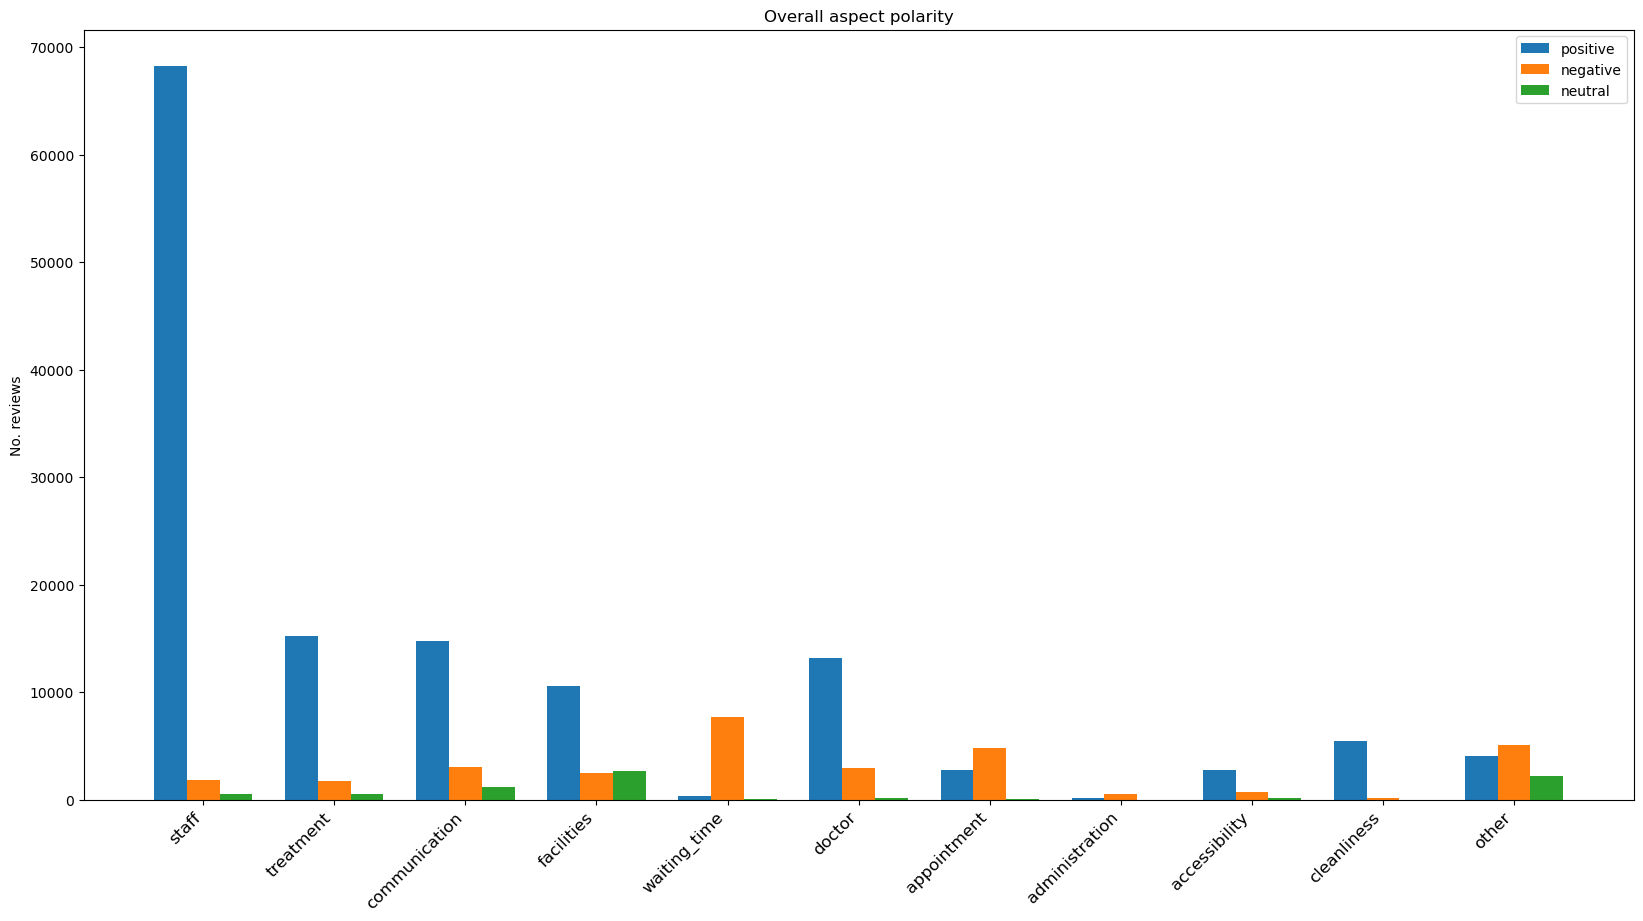

In [117]:
import numpy as np
import matplotlib.pyplot as plt

candidate_labels = [
    "staff", "treatment", "communication", "facilities", "waiting_time",
    "doctor", "appointment", "administration", "accessibility", "cleanliness", "other"
]

# Results' graph for general aspects
positives = [len(staff_aspect_loc_positive), len(treatment_aspect_loc_positive), len(communication_aspect_loc_positive), len(facilities_aspect_loc_positive), len(waiting_time_aspect_loc_positive), len(doctor_aspect_loc_positive), len(appointment_aspect_loc_positive), len(administration_aspect_loc_positive), len(accessibility_aspect_loc_positive), len(cleanliness_aspect_loc_positive), len(other_aspect_loc_positive)]
negatives = [len(staff_aspect_loc_negative),len(treatment_aspect_loc_negative),len(communication_aspect_loc_negative),len(facilities_aspect_loc_negative),len(waiting_time_aspect_loc_negative),len(doctor_aspect_loc_negative),len(appointment_aspect_loc_negative),len(administration_aspect_loc_negative),len(accessibility_aspect_loc_negative),len(cleanliness_aspect_loc_negative),len(other_aspect_loc_negative)]
neutrals = [len(staff_aspect_loc_neutral),len(treatment_aspect_loc_neutral),len(communication_aspect_loc_neutral),len(facilities_aspect_loc_neutral),len(waiting_time_aspect_loc_neutral),len(doctor_aspect_loc_neutral),len(appointment_aspect_loc_neutral),len(administration_aspect_loc_neutral),len(accessibility_aspect_loc_neutral),len(cleanliness_aspect_loc_neutral),len(other_aspect_loc_neutral)]

# Bar width and x locations
w, x = 0.25, np.arange(len(candidate_labels))

fig, ax = plt.subplots(figsize=(20,10))
ax.bar(x - w, positives, width=w, label='positive')
ax.bar(x, negatives, width=w, label='negative')
ax.bar(x + w, neutrals, width=w, label='neutral')

ax.set_xticks(x)
ax.set_xticklabels(candidate_labels)
ax.set_ylabel('No. reviews')
ax.set_title('Overall aspect polarity')
ax.legend()

ax.set_xticklabels(candidate_labels, rotation=45, ha='right', fontsize=12)

plt.show()

In [ ]:
#Word clouds for the most common words for "staff" and "waiting time"

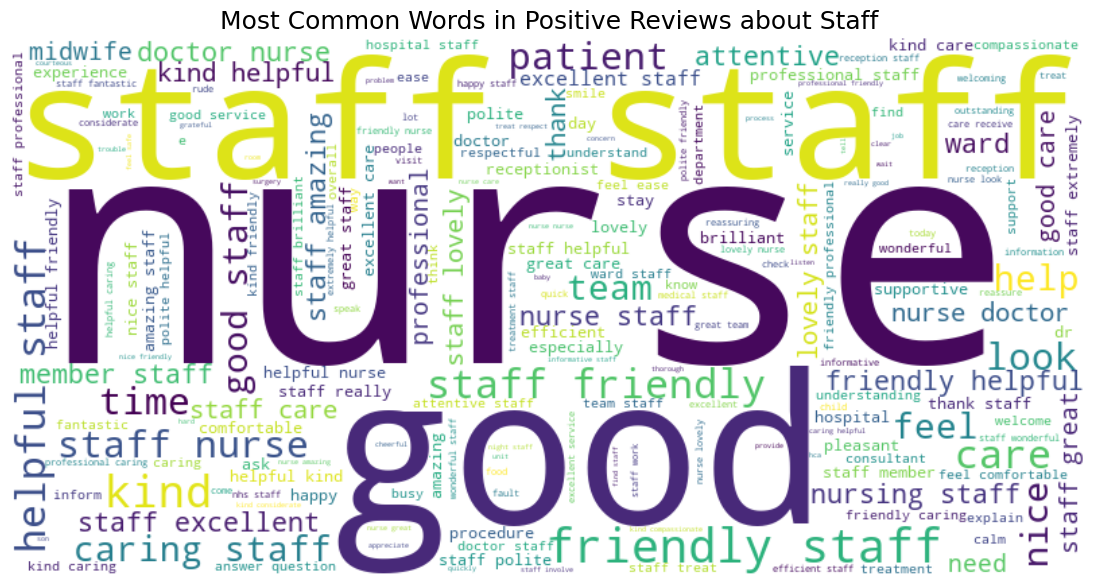

In [312]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Filter positive reviews about staff 
positive_staff_reviews = sent_df[
    (sent_df['predicted_aspect'] == 'staff') & 
    (sent_df['predicted_sentiment'] == 2)  # positive = 2
]


#Join all preprocessed reviews into a single string

text = ' '.join(positive_staff_reviews['sentence'].dropna())

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Positive Reviews about Staff", fontsize=18)
plt.show()


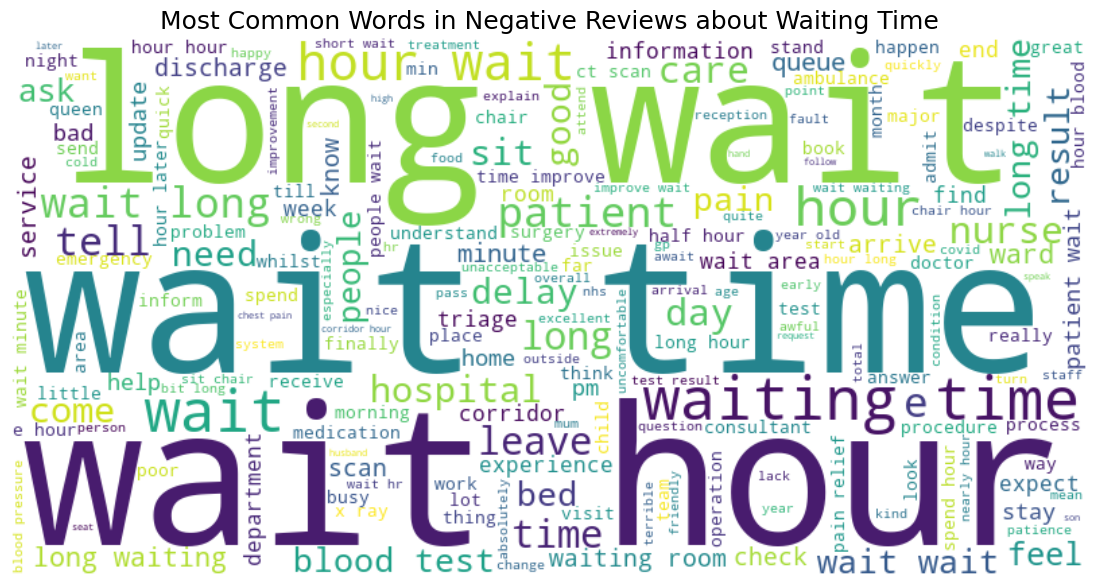

In [314]:
#Filter positive reviews about waiting time
negative_waiting_time_reviews = sent_df[
    (sent_df['predicted_aspect'] == 'waiting_time') & 
    (sent_df['predicted_sentiment'] == 0)  
]


#Join all preprocessed reviews into a single string

text = ' '.join(negative_waiting_time_reviews['sentence'].dropna())

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Negative Reviews about Waiting Time", fontsize=18)
plt.show()



In [ ]:
#TIME SERIES ANALYSIS

In [274]:
import pandas as pd
original = pd.read_csv('london_reviews')
df_clean = pd.read_csv('polarity_data.csv')

sent_df['indy'] = range(len(sent_df))
sent_df.set_index('indy', inplace=True)

rows_by_hospital_loc = {}
for title in original.titles.unique():
    loc = original.loc[(original.titles == title)]
    for ind in loc.index:
        rows_by_hospital_loc[str(ind)] = title

def hospital_finder(ID):
    return rows_by_hospital_loc[str(ID)]

hospitals_by_row = df_clean.review_id.apply(hospital_finder)
sent_df['hospitals'] = hospitals_by_row

def hospital_date_finder(ID):
    loc = original.iloc[ID]
    return loc.dates

hospitals_by_row_date = df_clean.review_id.apply(hospital_date_finder)
sent_df['dates'] = hospitals_by_row_date

sent_df

,review_id,sentence,predicted_aspect,input_text,predicted_sentiment,hospitals,dates,ones,year
indy,,,,,,,,,
0,0,dr saris very informative care require vacilla...,doctor,dr saris very informative care require vacilla...,2,Queen's Hospital,12th February 2025,1,2025
1,0,waiting time totally unacceptable time waste p...,waiting_time,waiting time totally unacceptable time waste p...,0,Queen's Hospital,12th February 2025,1,2025
2,1,contact 111 discharge treatment receive queens...,treatment,contact 111 discharge treatment receive queens...,2,Queen's Hospital,12th February 2025,1,2025
3,1,staff ocean b brilliant.,staff,staff ocean b brilliant. [ASPECT] staff,2,Queen's Hospital,12th February 2025,1,2025
4,2,extremely kind supportive ward very busy.,staff,extremely kind supportive ward very busy. [ASP...,2,Queen's Hospital,12th February 2025,1,2025
...,...,...,...,...,...,...,...,...,...
175751,207115,outpatient neurology team notch.,staff,outpatient neurology team notch. [ASPECT] staff,2,St George's Hospital,22nd March 2025,1,2025
175752,207116,ibd team st marks provide excellent care support.,staff,ibd team st marks provide excellent care suppo...,2,St George's Hospital,22nd March 2025,1,2025
175753,207116,receive great care nurse gladstone 2 ward cent...,facilities,receive great care nurse gladstone 2 ward cent...,2,St George's Hospital,22nd March 2025,1,2025


In [275]:
# conversion to datetime for use in series
# some dates were not returned by the parser. Only 4 - these are dropped.

missing_dates_indexes = sent_df.loc[(sent_df.dates == 'BLANK')].index
sent_df.drop(missing_dates_indexes, inplace=True)

# datetime creation. It's a British website, so dayfirst is used.
sent_df.dates = pd.to_datetime(sent_df.dates,format='mixed',dayfirst=True)


In [278]:
# identification of strongest positive aspects and strongest negative aspects (assuming one result for both)

# sent_df['ones']
# strongest_aspects = sent_df.predicted_aspect

import numpy as np
sent_df['ones'] = np.ones(len(sent_df))
staff_aspect_positive_loc = sent_df.loc[(sent_df.predicted_aspect == "staff") & (sent_df.predicted_sentiment == 2)]
staff_aspect_negative_loc = sent_df.loc[(sent_df.predicted_aspect == "staff") & (sent_df.predicted_sentiment == 0)]
staff_waitingtime_positive_loc = sent_df.loc[(sent_df.predicted_aspect == "waiting_time") & (sent_df.predicted_sentiment == 2)]
staff_waitingtime_negative_loc = sent_df.loc[(sent_df.predicted_aspect == "waiting_time") & (sent_df.predicted_sentiment == 0)]
groupby_staff_positive = staff_aspect_positive_loc.drop(['dates'],axis='columns').groupby('hospitals')
groupby_staff_negative = staff_aspect_negative_loc.drop(['dates'],axis='columns').groupby('hospitals')
groupby_waitingtime_positive = staff_waitingtime_positive_loc.drop(['dates'],axis='columns').groupby('hospitals')
groupby_waitingtime_negative = staff_waitingtime_negative_loc.drop(['dates'],axis='columns').groupby('hospitals')
top10_positive_staff = groupby_staff_positive.sum().sort_values(by='ones',ascending=False).index[:10].to_list()
top10_negative_staff = groupby_staff_negative.sum().sort_values(by='ones',ascending=False).index[:10].to_list()
top10_positive_waitingtime = groupby_waitingtime_positive.sum().sort_values(by='ones',ascending=False).index[:10].to_list()
top10_negative_waitingtime = groupby_waitingtime_negative.sum().sort_values(by='ones',ascending=False).index[:10].to_list()


# dropping 'ones' from sent_df to keep it clean
sent_df.drop(['ones'],axis='columns',inplace=True)

In [280]:
# latitude and longitude creation for map plotting
lats_and_longs = {
    "Queen's Hospital": (51.5686236,0.1788258),
    "King George Hospital": (51.5802148,0.1100253),
    "Northwick Park Hospital":(51.5754036,-0.322747),
    "The Royal London Hospital":(51.5181204,-0.0614984),
    "Ealing Hospital": (51.507708, -0.346130),
    "St Peter's Hospital": (51.376941, -0.528961),
    "Whipps Cross University Hospital": (51.577650, 0.003525),
    "St Bartholomew's Hospital":(51.517711, -0.099972),
    "Newham University Hospital":(51.522866, 0.038112),
    "Central Middlesex Hospital": (51.531070, -0.269282),
    "St Helier Hospital": (51.380726, -0.184441),
    "Community Services - Barking, Havering and Redbridge University Hospitals NHS Trust": (51.568799, 0.180277),
    "Ashford Hospital": (51.443954, -0.473077),
    "St Mark's Hospital": (51.576152, -0.320454),
    "The Royal Marsden Hospital (Sutton)": (51.343177, -0.190590),
    "The Royal Marsden Hospital (Chelsea)": (51.490825, -0.173084),
    "Community Services -  London North West Healthcare NHS Trust": (51.575482, -0.322590),
    "Epsom General Hospital": (51.325320047075245, -0.2734134033176173),
    "Caterham Dene Hospital": (51.283809, -0.085558),
    "Community Services - Barts Health NHS Trust": (51.51785261954613, -0.10051147033989645),
    "Barking Hospital": (51.539021, 0.098941),
    "Mile End Hospital": (51.52504964944559, -0.0420365556274924),
    "The Elective Orthopaedic Centre": (51.32473263576611, -0.2724524371833852),
    "Cleveland Clinic London Hospital": (51.49954894002877, -0.14837449739464018),
    "Cleveland Clinic Portland Place Outpatient Centre": (51.519382260114234, -0.1450977346655401),
    "Cleveland Clinic Grosvenor Place Outpatient Centre": (51.49954894002800, -0.14837449739464000),
    "Mount Vernon Hospital": (51.615517864818464, -0.4455742812885301),
    "King's College Hospital": (51.46869617072, -0.09226358116544223),
    "Princess Royal University Hospital": (51.36623735323647, 0.058360150505593844),
    "Brook Camden and Islington": (51.530802885539515, -0.13096607213312256),
    "Community Services - Epsom and St Helier University Hospitals NHS Trust": (51.380373, -0.183772),
    "Community Services - Ashford & St Peter's Hospitals NHS Foundation Trust": (51.444059201679686, -0.47265064078646724),
    "Clayponds Hospital": (51.494895, -0.298788),
    "Community Services - The Hillingdon Hospitals NHS Foundation Trust": (51.525431, -0.461005),
    "Kingston Hospital": (51.41494211561913, -0.2818841184818905),
    "Wembley Centre for Health and Care": (51.55020850195721, -0.3055424068368136),
    "Walton Community Hospital": (51.380058724984835, -0.406301818536351),
    "Leatherhead Hospital": (51.29527273945891, -0.3194050375421345),
    "The Hall": (51.616359, 0.184789),
    "Cleveland Clinic Moorgate Outpatient Centre": (51.516916717595336, -0.08848838963961318),
    "Epsom General Hospital CSH Surrey": (51.324991230038506, -0.2727354479270573),
    "Croydon University Hospital": (51.389942859938515, -0.11017403026242148),
    "Orpington Hospital": (51.36246006390021, 0.09520549077294119),
    "Guy's Hospital": (51.503252655497214, -0.08663501921199349),
    "Goodmayes Hospital": (51.57828211741692, 0.11002833734625489),
    "Parkside Hospital": (51.43580084854134, -0.22374959395873664),
    "Charing Cross Hospital": (51.48702248718407, -0.21914660684055265),
    "The Holly Private Hospital": (51.624460905861284, 0.032260790790709225),
    "The Runnymede Hospital - part of Circle Health Group": (51.37806901273602, -0.5232933147759469),
    "University College Hospital": (51.52509339723984, -0.1363908624737471),
    "Ashtead Hospital": (51.304620243391064, -0.30310915474081906),
    "Cromwell Hospital": (51.49511138243224, -0.19119626270852028),
    "Bourne Hall Health Centre": (51.351357751166624, -0.252364312376817),
    "HYP Southwark": (51.48072928834171, -0.0935128031908256),
    "The London Clinic": (51.52295720745337, -0.1501568599350352),
    "New Victoria Hospital": (51.41595305178402, -0.25410208011890884),
    "Chelsfield Park Hospital - part of Circle Health Group": (51.35823176607709, 0.13146227039053715),
    "The London Independent Hospital - part of Circle Health Group": (51.520516564888325, -0.04639739890959595),
    "Spire St Anthony's Hospital": (51.37960749121353, -0.22015704732025887),
    "Veincentre London": (51.518293447928556, -0.14553769334760813),
    "Whittington Hospital": (51.56665265883981, -0.1397138080252531),
    "Spire London East Hospital": (51.58703095390739, 0.04352409330004669),
    "St Thomas' Hospital": (51.49922986610858, -0.11872556620452236),
    "Hendon Hospital -  part of Circle Health Group": (51.59394753874422, -0.22438713752461367),
    "Harefield Hospital": (51.60681825559496, -0.4824955455453384),
    "Homerton University Hospital": (51.55081088595798, -0.04512947429243609),
    "Great Ormond Street Hospital for Children": (51.52319520719919, -0.12050726654877075),
    "DASH Lambeth": (51.43295248906074, -0.12816543331322963),
    "Shirley Oaks Hospital - part of Circle Health Group": (51.38235139366526, -0.05597249335558002),
    "The Lister Hospital": (51.48673318803178, -0.1499646026196639),
    "Staines Health Centre": (51.42912593528084, -0.5012310872778686),
    "The Cavell Hospital - part of Circle Health Group": (51.65891213250996, -0.1030117132074451),
    "Chertsey Health Centre": (51.388084052922636, -0.4961289251207252),
    "The Blackheath Hospital - part of Circle Health Group": (51.463641939886145, 0.006594697378993189),
    "Bishops Wood Hospital - part of Circle Health Group": (51.61665015409338, -0.4469549179572298),
    "Highgate Hospital Ltd": (51.57664151267237, -0.1570391127614689),
    "Community Care Services - First Community Health and Care": (51.28358469351828, -0.08514824787423998),
    "Cobham Community Hospital": (51.334788769253656, -0.4077410677207772),
    "Royal National Throat, Nose and Ear Hospital": (51.52271666669004, -0.13459644178823363),
    "Hammersmith Hospital": (51.517362279938176, -0.23507239942262037),
    "Ashford Clinic": (51.43924537406753, -0.47121535665152314),
    "North Downs Hospital": (51.27440150927895, -0.07996851478203496),
    "Health Visiting - First Community Health and Care": (51.283475, -0.085994),
    "Chase Farm Hospital": (51.666928721839994, -0.10271475237037954),
    "The Portland Hospital": (51.52311902847598, -0.1437413626569757),
    "The Kings Oak Hospital - part of Circle Health Group": (51.66795037332089, -0.10543597191867994),
    "The Harley Street Clinic": (51.520445156777505, -0.14797653178233486),
    "The Sloane Hospital - part of Circle Health Group": (51.40845293271396, -0.004901196549288142),
    "Ilford Exchange Health Centre": (51.5590992526051, 0.07238160526559675),
    "Kingston Private Health": (51.41520138882412, -0.28170020313669497),
    "Queen Mary's Hospital 2": (51.455763064629274, -0.2421352050388715),
    "The Princess Royal University Hospital": (51.36627034378192, 0.0586015931179872),
    "Evelina Children's Hospital": (51.498445995501335, -0.11785703011405131),
    "Epsom Day Surgery": (51.33465152702558, -0.2546430184865783),
    "Weymouth Street Hospital": (51.52033868596352, -0.14995271662165457),
    "The Harley Street Specialist Hospital": (51.51820894760507, -0.14687306214858836),
    "HCA UK At Chiswick Medical Centre": (51.49275664086122, -0.2704046905051099),
    "West Valley Hospital": (51.379977732590184, -0.100048233829091),
    "Beckenham Beacon": (51.40504522290232, -0.033554398928632115),
    "The Lindo Wing": (51.51771530750511, -0.17369809942259581),
    "Westland Medical Centre": (51.56340337200495, 0.22288833549136314),
    "The Harley Street Hospital": (51.517450474967085, -0.14646872252514725),
    "North East London NHS Treatment Centre": (51.579023, 0.111014),
    "Barking Birth Centre": (51.53885232301122, 0.09888898337943951),
    "Circle Health MSK Greenwich Service": (51.44934154821666, 0.05406035024846505),
    "Queen Anne Street Medical Centre": (51.518051, -0.147009),
    "Ashford Hospital CSH Surrey": (51.44411715523105, -0.47290144309556204),
    "Nelson Hospital": (51.41073270727099, -0.20789161106595566),
    "The London Knee Clinic": (51.506363, -0.086401),
    "Jules Thorn Day Unit": (51.536593387708564, -0.1315555682149054),
    "King Edward VII (Outpatients)": (51.521244, -0.150163),
    "Nuffield Health At St Bartholomew's Hospital": (51.51780796816179, -0.09985883062577107),
    "Cobham Day Surgery": (51.33484070519723, -0.4073176724510827),
    "Platinum Medical Centre": (51.52880165744092, -0.16835986650729196),
    "Hillingdon Hospital": (51.525359524502264, -0.4610479952012465),
    "North Central London": (51.522312, -0.217420),
    "Inner North West London": (51.522368, -0.217695),
    "Willesden Hospital": (51.542855667890706, -0.23562366822275616),
    "Burrell Street Sexual Health Clinic": (51.506381008951934, -0.1030648095410556),
    "Chelsea and Westminster Hospital": (51.48448152659745, -0.1811117166237613),
    "St George's Hospital": (51.426592953999176, -0.17478448194918333),
    "The Royal Free Hospital": (51.55394374906701, -0.16566467614630204),
    "The Clementine Churchill Hospital - part of Circle Health Group": (51.565179680771, -0.33166001847306664),
    "London Bridge Hospital": (51.506321051171824, -0.08599825843704706),
    "St Mary's Hospital 4": (51.5176424907579, -0.17392429523120767),
    "St John & St Elizabeth Hospital": (51.53343274706366, -0.1740499859305568),
    "Moorfields Eye Hospital": (51.52749838548242, -0.09001341529270301),
    "Thurrock Hospital": (51.49685269078622, 0.3359891122942439),
    "Royal National Orthopaedic Hospital": (51.63186404295343, -0.31116256198755704),
    "Barnet Hospital": (51.650563464228014, -0.21414457614060525),
    "The Princess Grace Hospital": (51.52272127821258, -0.1523852147674543),
    "North Middlesex Hospital": (51.61318842087344, -0.07312186265167034),
    "Royal Brompton Hospital": (51.48924388067491, -0.1697820798581932),
    "King Edward VII Hospital 2": (51.52091060551867, -0.15000765290250673),
    "West Middlesex University Hospital": (51.47346515104611, -0.3239597049872904),
    "The Northey Suite": (51.324965444766406, -0.2730674326750969),
    "The Lewisham Hospital": (51.453884516992595, -0.017219209847906997),
    "The London Welbeck Hospital": (51.51835714297756, -0.14914113752907215),
    "Edgware Community Hospital": (51.60557222657984, -0.2724610258883741),
    "Teddington Memorial Hospital": (51.426256106459384, -0.34049369520704853),
    "Chelsea Outpatient Centre": (51.48653246522633, -0.1708952398977819),
    "Cheshunt Community Hospital": (51.699451161479644, -0.033421069549939925),
    "The Wellington Hospital": (51.531607860123735, -0.17125211323665068),
    "Ealing And Hounslow": (51.522033, -0.217485),
    "The National Hospital for Neurology and Neurosurgery": (51.522362056814174, -0.12217994309094636),
    "Nightingale Hospital": (51.52199930901918, -0.1650144756353546),
    "Gateway Surgical Centre": (51.52122133237401, 0.04032462384133759),
    "Orsett Hospital": (51.50987506186203, 0.3664712427319064),
    "Maudsley Hospital": (51.4688655370203, -0.0918662584392384),
    "Finchley Memorial Hospital": (51.60545419762464, -0.1760746305421217),
    "Ashford Walk-in-centre": (51.44429493538888, -0.4740167349212869),
    "10 Harley Street": (51.51744810738626, -0.1459199753626153),
    "The Priory Hospital Hayes Grove": (51.37312066349351, 0.015109643697847962),
    "St Charles' Hospital": (51.522128, -0.216851),
    "Queen Elizabeth Hospital 4": (51.47916299208455, 0.050138517299308585),
    "Highgate Mental Health Centre": (51.56717130444568, -0.14171275843349462),
    "City And Hackney": (51.521927, -0.217688),
    "The Priory Hospital North London": (51.63078116552701, -0.12209699519503332),
    "The Priory Hospital Roehampton": (51.46269497411387, -0.25134143011614196),
    "The Eastman Dental Hospital": (51.52595624125402, -0.11715190652277976),
    "Mount Vernon Cancer Centre": (51.61501392187018, -0.4465484221782183),
    "The Harley Street ENT Clinic": (51.52145826492872, -0.14764484545786308),
    "Tavistock Clinic": (51.546821711145896, -0.17517050571966059),
    "Epsom Clinic": (51.3325674358934, -0.2618678068496111),
    "The Meadows": (51.33988803801928, -0.3000363480341422),
    "Violet Melchett Health Centre": (51.48689229410208, -0.16609550725197514),
    "Queen Charlotte's and Chelsea Hospital": (51.51651325366889, -0.23685455894928478),
    "Abraham Cowley Unit": (51.37750176169631, -0.5257348067471699),
    "Cygnet Hospital Beckton": (51.51387985478931, 0.06569389264817357),
    "Gordon Hospital": (51.49242161129414, -0.13607429098224477),
    "The Huntercombe Roehampton Hospital": (51.44780773201576, -0.24218974928689002),
}

In [282]:
import numpy as np

# Add helper column for counting
sent_df['ones'] = np.ones(len(sent_df))

# Filter by aspect and sentiment
staff_aspect_positive_loc = sent_df.loc[
    (sent_df.predicted_aspect == "staff") & (sent_df.predicted_sentiment == 2)
]
staff_aspect_negative_loc = sent_df.loc[
    (sent_df.predicted_aspect == "staff") & (sent_df.predicted_sentiment == 0)
]

# Group by hospitals and sum only the 'ones' column
groupby_staff_positive = staff_aspect_positive_loc.groupby('hospitals')['ones'].sum().to_frame(name='positive_count')
groupby_staff_negative = staff_aspect_negative_loc.groupby('hospitals')['ones'].sum().to_frame(name='negative_count')

# Merge counts
staff_sentiment_summary = groupby_staff_positive.join(groupby_staff_negative, how='outer').fillna(0)

# Compute net score and positive ratio
staff_sentiment_summary['net_score'] = (
    staff_sentiment_summary['positive_count'] - staff_sentiment_summary['negative_count']
)

staff_sentiment_summary['pos_ratio'] = staff_sentiment_summary['positive_count'] / (
    staff_sentiment_summary['positive_count'] + staff_sentiment_summary['negative_count']
)

# Get top and bottom hospitals by net score
top10_positive_staff = staff_sentiment_summary.sort_values(by='net_score', ascending=False).head(10).index.tolist()
top10_negative_staff = staff_sentiment_summary.sort_values(by='net_score', ascending=True).head(10).index.tolist()

# Optionally view result
print("Top 10 Positive (staff):")
print(top10_positive_staff)

print("\nTop 10 Negative (staff):")
print(top10_negative_staff)

Top 10 Positive (staff):
["Queen's Hospital", 'Northwick Park Hospital', 'King George Hospital', 'Ealing Hospital', "King's College Hospital", 'Central Middlesex Hospital', 'Cleveland Clinic London Hospital', 'Princess Royal University Hospital', "St Mark's Hospital", 'Community Services - Barking, Havering and Redbridge University Hospitals NHS Trust']

Top 10 Negative (staff):
['The Priory Hospital North London', "St Charles' Hospital", 'Edgware Community Hospital', "Queen Charlotte's and Chelsea Hospital", 'Teddington Memorial Hospital', 'The Eastman Dental Hospital', 'Great Ormond Street Hospital for Children', "Community Services - Ashford & St Peter's Hospitals NHS Foundation Trust", "Nuffield Health At St Bartholomew's Hospital", 'Platinum Medical Centre']


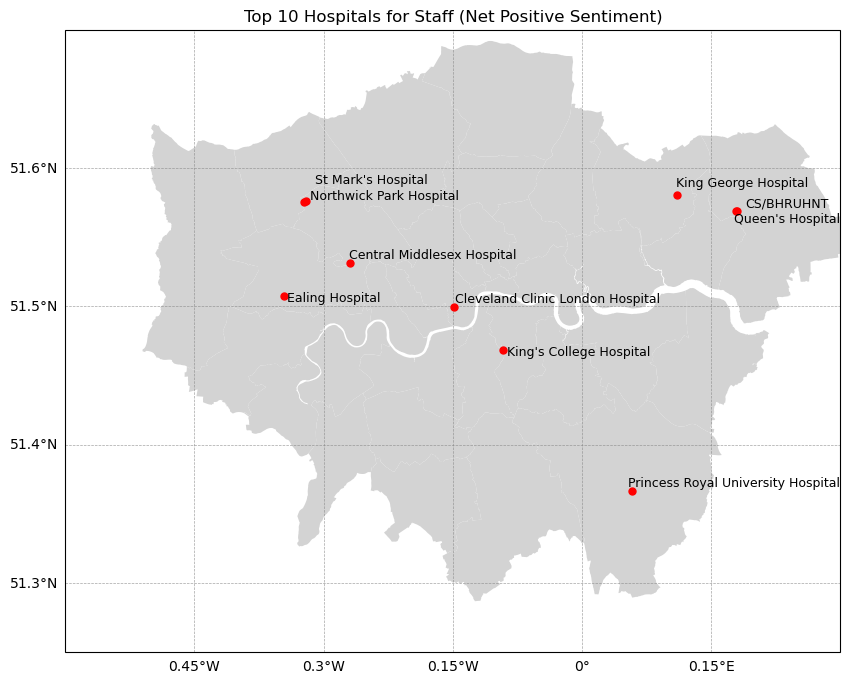

In [270]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from adjustText import adjust_text

# Load shapefile and reproject if needed
gdf = gpd.read_file("statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")
if gdf.crs != "EPSG:4326":
    gdf = gdf.to_crs(epsg=4326)

# Create map
fig, ax = plt.subplots(figsize=(10, 12), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-0.6, 0.3, 51.25, 51.7], crs=ccrs.PlateCarree())

# Plot boroughs
gdf.plot(ax=ax, facecolor='lightgray', edgecolor='none', linewidth=1)

# Add lat/lon gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Handle long name alias
alias = "Community Services - Barking, Havering and Redbridge University Hospitals NHS Trust"
display_names = []
locations = {}

for name in top10_positive_staff:
    display_name = "CS/BHRUHNT" if name == alias else name
    display_names.append(display_name)
    locations[display_name] = lats_and_longs[name]

# Plot and label
texts = []
for name, (lat, lon) in locations.items():
    ax.plot(lon, lat, marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())
    texts.append(ax.text(lon, lat, name, transform=ccrs.PlateCarree(), fontsize=9))

adjust_text(texts, ax=ax)

# Title
ax.set_title("Top 10 Hospitals for Staff (Net Positive Sentiment)")

plt.show()


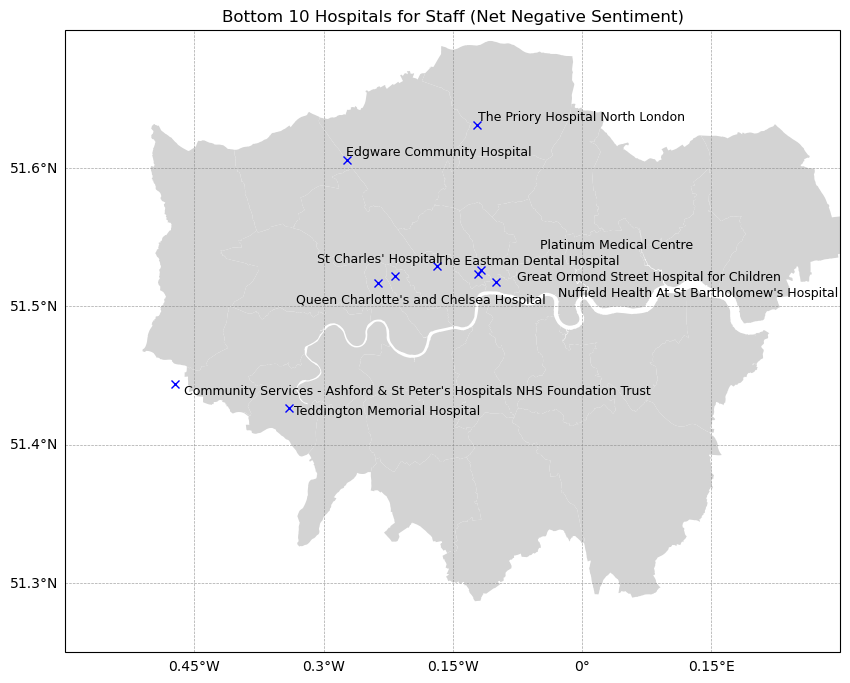

In [284]:
# Load shapefile and reproject if needed
gdf = gpd.read_file("statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")
if gdf.crs != "EPSG:4326":
    gdf = gdf.to_crs(epsg=4326)

# Create map
fig, ax = plt.subplots(figsize=(10, 12), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-0.6, 0.3, 51.25, 51.7], crs=ccrs.PlateCarree())

# Plot boroughs
gdf.plot(ax=ax, facecolor='lightgray', edgecolor='none', linewidth=1)

# Add lat/lon gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Handle name shortening (if needed)
alias = "Community Services - Barking, Havering and Redbridge University Hospitals NHS Trust"
display_names = []
locations = {}

for name in top10_negative_staff:
    display_name = "CS/BHRUHNT" if name == alias else name
    display_names.append(display_name)
    locations[display_name] = lats_and_longs[name]

# Plot and label
texts = []
for name, (lat, lon) in locations.items():
    ax.plot(lon, lat, marker='x', color='blue', markersize=6, transform=ccrs.PlateCarree())
    texts.append(ax.text(lon, lat, name, transform=ccrs.PlateCarree(), fontsize=9))

adjust_text(texts, ax=ax)

# Title
ax.set_title("Bottom 10 Hospitals for Staff (Net Negative Sentiment)")

plt.show()


In [286]:
# Add the 'ones' column if not already added
if 'ones' not in sent_df.columns:
    sent_df['ones'] = 1

# Filter review sentences related to the 'waiting_time' aspect
waitingtime_positive = sent_df[
    (sent_df.predicted_aspect == "waiting_time") & (sent_df.predicted_sentiment == 2)
]
waitingtime_negative = sent_df[
    (sent_df.predicted_aspect == "waiting_time") & (sent_df.predicted_sentiment == 0)
]

# Group by hospital, summing only the 'ones' column (to count mentions)
groupby_waitingtime_positive = waitingtime_positive.groupby('hospitals')['ones'].sum().to_frame(name='positive_count')
groupby_waitingtime_negative = waitingtime_negative.groupby('hospitals')['ones'].sum().to_frame(name='negative_count')

# Merge positive and negative counts
waiting_sentiment_summary = groupby_waitingtime_positive.join(
    groupby_waitingtime_negative, how='outer'
).fillna(0)

# Calculate net sentiment and positive ratio
waiting_sentiment_summary['net_score'] = (
    waiting_sentiment_summary['positive_count'] - waiting_sentiment_summary['negative_count']
)
waiting_sentiment_summary['pos_ratio'] = waiting_sentiment_summary['positive_count'] / (
    waiting_sentiment_summary['positive_count'] + waiting_sentiment_summary['negative_count']
)

# Get top and bottom hospitals by net sentiment
top10_positive_waitingtime = (
    waiting_sentiment_summary.sort_values(by='net_score', ascending=False).head(10).index.tolist()
)
top10_negative_waitingtime = (
    waiting_sentiment_summary.sort_values(by='net_score', ascending=True).head(10).index.tolist()
)

# Optional: inspect results
print("Top 10 Positive (waiting_time):")
print(top10_positive_waitingtime)

print("\nTop 10 Negative (waiting_time):")
print(top10_negative_waitingtime)


Top 10 Positive (waiting_time):
['St John & St Elizabeth Hospital', 'Ilford Exchange Health Centre', 'Goodmayes Hospital', 'New Victoria Hospital', 'The Lister Hospital', 'Epsom Day Surgery', 'Epsom General Hospital', "Evelina Children's Hospital", 'Highgate Hospital Ltd', 'Homerton University Hospital']

Top 10 Negative (waiting_time):
["Queen's Hospital", 'Northwick Park Hospital', 'King George Hospital', 'Ealing Hospital', 'Central Middlesex Hospital', "St Peter's Hospital", 'Cleveland Clinic London Hospital', 'Caterham Dene Hospital', "St Mark's Hospital", 'Cleveland Clinic Grosvenor Place Outpatient Centre']


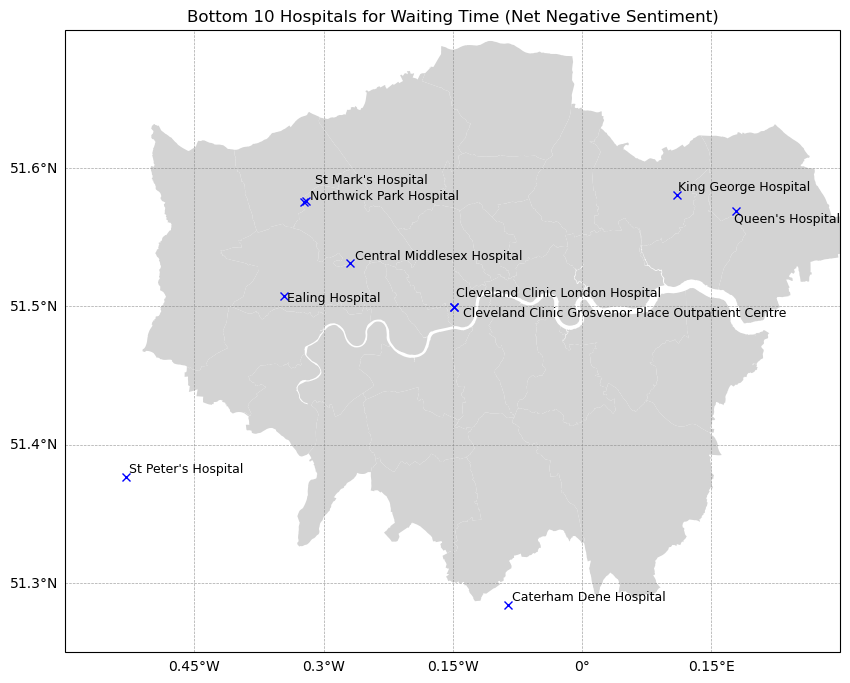

In [288]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from adjustText import adjust_text

# Load London borough boundaries
gdf = gpd.read_file("statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")
if gdf.crs != "EPSG:4326":
    gdf = gdf.to_crs(epsg=4326)

# Set up the map
fig, ax = plt.subplots(figsize=(10, 12), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-0.6, 0.3, 51.25, 51.7], crs=ccrs.PlateCarree())

# Plot borough background with no borders
gdf.plot(ax=ax, facecolor='lightgray', edgecolor='none', linewidth=1)

# Add latitude/longitude gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Name shortening for long trust name
alias = "Community Services - Barking, Havering and Redbridge University Hospitals NHS Trust"

# Build locations dictionary with display name mapping
locations = {}
for name in top10_negative_waitingtime:
    display_name = "CS/BHRUHNT" if name == alias else name
    locations[display_name] = lats_and_longs[name]

# Plot hospital points and labels
texts = []
for name, (lat, lon) in locations.items():
    ax.plot(lon, lat, marker='x', color='blue', markersize=6, transform=ccrs.PlateCarree())
    texts.append(ax.text(lon, lat, name, transform=ccrs.PlateCarree(), fontsize=9))

adjust_text(texts, ax=ax)

# Map title
ax.set_title("Bottom 10 Hospitals for Waiting Time (Net Negative Sentiment)")

plt.show()


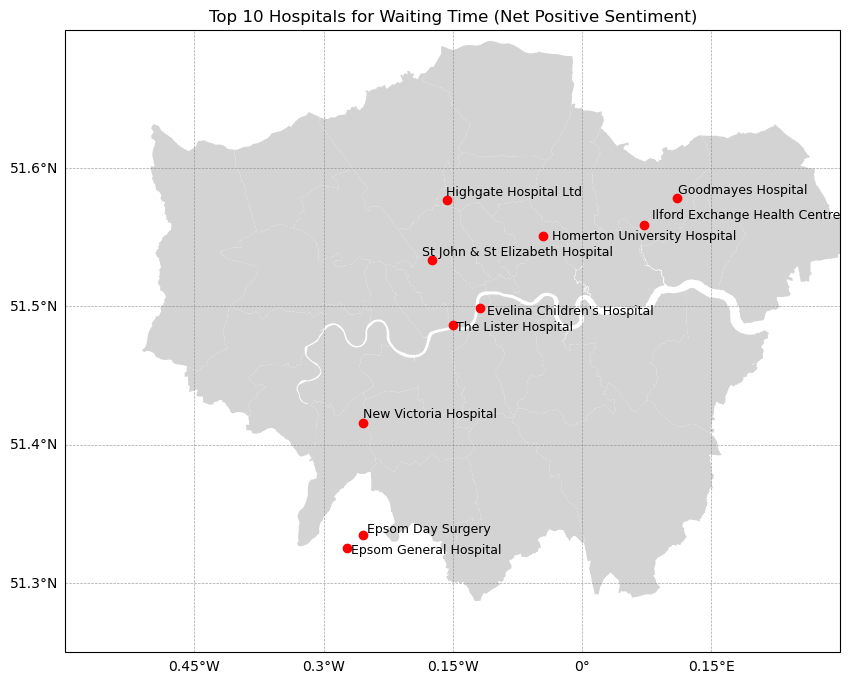

In [290]:
# Load London borough shapefile
gdf = gpd.read_file("statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")
if gdf.crs != "EPSG:4326":
    gdf = gdf.to_crs(epsg=4326)

# Set up map figure
fig, ax = plt.subplots(figsize=(10, 12), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-0.6, 0.3, 51.25, 51.7], crs=ccrs.PlateCarree())

# Plot boroughs with light fill and no borders
gdf.plot(ax=ax, facecolor='lightgray', edgecolor='none')

# Add latitude/longitude gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Optional: handle name aliasing for long hospital names
alias = "Community Services - Barking, Havering and Redbridge University Hospitals NHS Trust"

# Build locations dictionary
locations = {}
for name in top10_positive_waitingtime:
    display_name = "CS/BHRUHNT" if name == alias else name
    locations[display_name] = lats_and_longs[name]

# Plot points and labels
texts = []
for name, (lat, lon) in locations.items():
    ax.plot(lon, lat, marker='o', color='red', markersize=6, transform=ccrs.PlateCarree())
    texts.append(ax.text(lon, lat, name, transform=ccrs.PlateCarree(), fontsize=9))

adjust_text(texts, ax=ax)

# Map title
ax.set_title("Top 10 Hospitals for Waiting Time (Net Positive Sentiment)")

plt.show()


In [292]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

year_function = lambda x: x.year
sent_df['year'] = sent_df.dates.apply(year_function)

# Only use relevant aspects and ensure 'year' exists
aspects = ['staff', 'waiting_time']
recent_years = sorted(sent_df['year'].dropna().unique())[-5:]
filtered = sent_df[sent_df['predicted_aspect'].isin(aspects) & sent_df['year'].isin(recent_years)]

# Count positive and negative reviews by year and aspect
grouped = (
    filtered.groupby(['year', 'predicted_aspect', 'predicted_sentiment'])
    .size()
    .unstack(fill_value=0)
    .rename(columns={0: 'neg', 2: 'pos'})
)

# Fill missing sentiment columns if needed
for col in ['neg', 'pos']:
    if col not in grouped.columns:
        grouped[col] = 0

# Calculate net sentiment and positive ratio
grouped['net_sentiment'] = grouped['pos'] - grouped['neg']
grouped['pos_ratio'] = grouped['pos'] / (grouped['pos'] + grouped['neg'])

# Reset index for plotting and summary
grouped = grouped.reset_index()



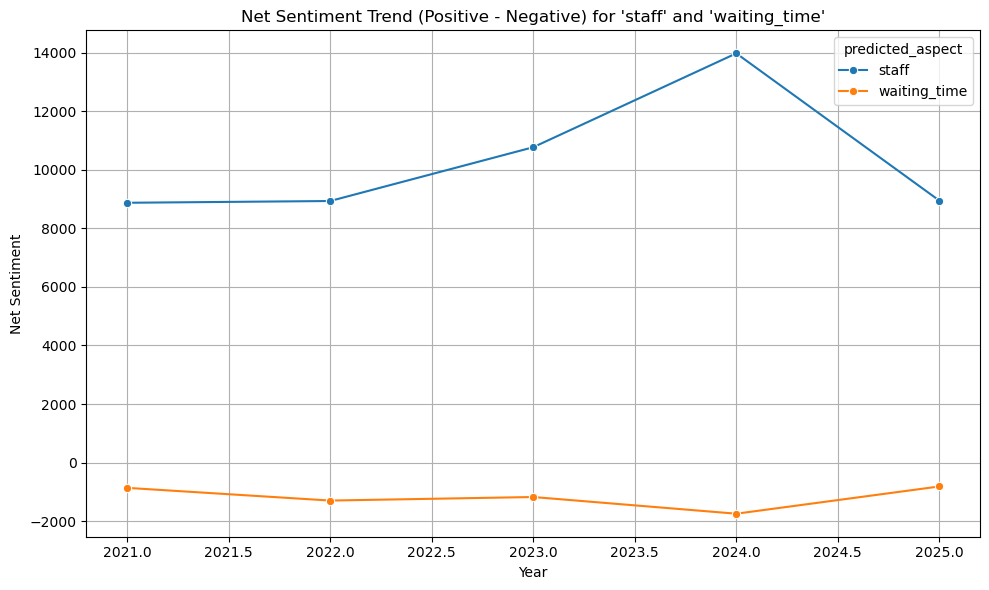

In [294]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='year', y='net_sentiment', hue='predicted_aspect', marker='o')
plt.title("Net Sentiment Trend (Positive - Negative) for 'staff' and 'waiting_time'")
plt.xlabel("Year")
plt.ylabel("Net Sentiment")
plt.grid(True)
plt.tight_layout()
plt.show()


In [296]:
for aspect in aspects:
    aspect_data = grouped[grouped['predicted_aspect'] == aspect].sort_values('year')
    first = aspect_data.iloc[0]
    last = aspect_data.iloc[-1]
    
    # Detect polarity change or direction
    if first['net_sentiment'] * last['net_sentiment'] < 0:
        polarity = "reversed"
    elif last['net_sentiment'] > first['net_sentiment']:
        polarity = "increased"
    elif last['net_sentiment'] < first['net_sentiment']:
        polarity = "decreased"
    else:
        polarity = "unchanged"
    
    print(f"{aspect.title()} sentiment has {polarity} from {int(first['year'])} to {int(last['year'])} "
          f"({int(first['net_sentiment'])} → {int(last['net_sentiment'])})")


Staff sentiment has increased from 2021 to 2025 (8874 → 8947)
Waiting_Time sentiment has increased from 2021 to 2025 (-864 → -816)


In [256]:
sent_df['dates'] = pd.to_datetime(sent_df['dates'])

In [258]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(sent_df['sentence'])



In [260]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

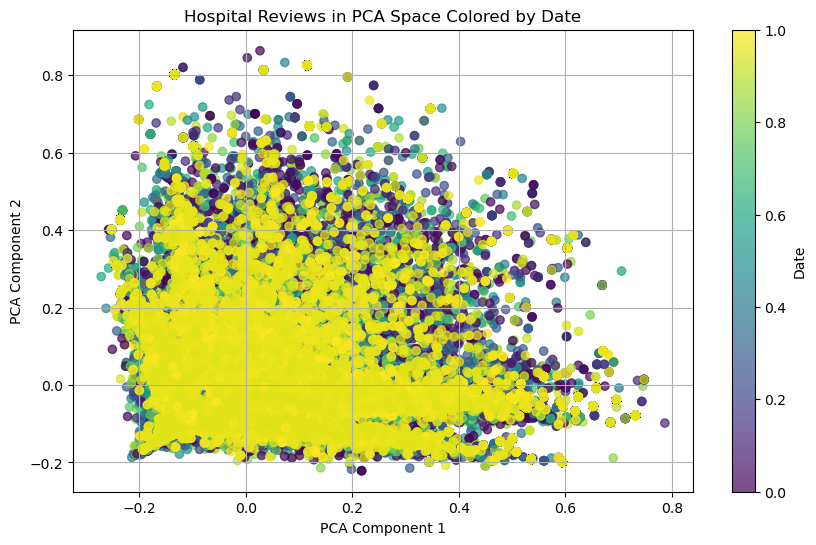

In [262]:
import matplotlib.pyplot as plt

norm = plt.Normalize(sent_df['dates'].min().toordinal(), sent_df['dates'].max().toordinal())
colors = plt.cm.viridis(norm(sent_df['dates'].apply(lambda x: x.toordinal())))

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.7)
plt.colorbar(label='Date')
plt.title('Hospital Reviews in PCA Space Colored by Date')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()
